In [ ]:
# Set seeds for reproducibility
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
DATA_PATH = config.PATH_TO_DATA


cuda:0


# Notebook to Train and Experiment with Custom U-Net

In [ ]:

from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR
import torch.nn as nn

from models.unet_model import UNet
from utils.data import create_dataloaders
from utils.train import run_training
from utils.evaluation import visualise_batch_predictions, evaluate

In [ ]:
seed = 42
torch.manual_seed(seed)

### Imports and Global Settings

In [ ]:
max_epochs = 10
batch_size = 16
learning_rate = 1e-4
project_name = "U-Net_Baselines"
weight_tensor = torch.tensor([1.0, 1.0], device=device)

## RGB Baseline

In [ ]:
bands = [0, 1, 2]
%load_ext autoreload
%autoreload 2

torch.manual_seed(seed)
train_loader, val_loader, test_loader = create_dataloaders(data_dir=DATA_PATH, batch_size=batch_size, bands=bands)

def init_weights(m):
  if isinstance(m, nn.Conv2d):
      torch.nn.init.kaiming_normal_(m.weight)

def fetch_UNet(n_channels, n_classes):
  model = UNet(n_channels=n_channels, n_classes=n_classes)
  model.apply(init_weights)
  return model

# define model
model = fetch_UNet(n_channels=len(bands), n_classes=2)
model.to(device)
optimizer = AdamW(model.parameters(),
                              lr=learning_rate,
                              weight_decay=1e-2)

scheduler = CosineAnnealingLR(optimizer, max_epochs)
criterion = torch.nn.CrossEntropyLoss()



<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 1-0 batch_loss=9.62e-01 batch_acc=0.266
Train Epoch: 1-6 batch_loss=5.72e-01 batch_acc=0.774
Train Epoch: 1-12 batch_loss=4.55e-01 batch_acc=0.856
Train Epoch: 1-18 batch_loss=3.38e-01 batch_acc=0.903
Train Epoch: 1-24 batch_loss=6.73e-01 batch_acc=0.685
Train Epoch: 1-30 batch_loss=5.25e-01 batch_acc=0.752
Train Epoch: 1-36 batch_loss=4.52e-01 batch_acc=0.813
Train Epoch: 1-42 batch_loss=6.34e-01 batch_acc=0.671
Train Epoch: 1-48 batch_loss=4.26e-01 batch_acc=0.815
Train Epoch: 1-54 batch_loss=4.50e-01 batch_acc=0.855
Train Epoch: 1-60 batch_loss=3.90e-01 batch_acc=0.854


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 2-0 batch_loss=3.65e-01 batch_acc=0.851
Train Epoch: 2-6 batch_loss=3.89e-01 batch_acc=0.834
Train Epoch: 2-12 batch_loss=3.27e-01 batch_acc=0.872
Train Epoch: 2-18 batch_loss=2.73e-01 batch_acc=0.920
Train Epoch: 2-24 batch_loss=5.88e-01 batch_acc=0.679
Train Epoch: 2-30 batch_loss=4.62e-01 batch_acc=0.773
Train Epoch: 2-36 batch_loss=3.98e-01 batch_acc=0.835
Train Epoch: 2-42 batch_loss=4.70e-01 batch_acc=0.749
Train Epoch: 2-48 batch_loss=3.61e-01 batch_acc=0.836
Train Epoch: 2-54 batch_loss=3.49e-01 batch_acc=0.874
Train Epoch: 2-60 batch_loss=3.16e-01 batch_acc=0.871


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 3-0 batch_loss=3.23e-01 batch_acc=0.866
Train Epoch: 3-6 batch_loss=3.30e-01 batch_acc=0.855
Train Epoch: 3-12 batch_loss=2.82e-01 batch_acc=0.890
Train Epoch: 3-18 batch_loss=2.31e-01 batch_acc=0.931
Train Epoch: 3-24 batch_loss=4.82e-01 batch_acc=0.737
Train Epoch: 3-30 batch_loss=3.97e-01 batch_acc=0.810
Train Epoch: 3-36 batch_loss=3.56e-01 batch_acc=0.846
Train Epoch: 3-42 batch_loss=4.26e-01 batch_acc=0.767
Train Epoch: 3-48 batch_loss=3.17e-01 batch_acc=0.858
Train Epoch: 3-54 batch_loss=3.02e-01 batch_acc=0.883
Train Epoch: 3-60 batch_loss=3.97e-01 batch_acc=0.810


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 4-0 batch_loss=3.19e-01 batch_acc=0.866
Train Epoch: 4-6 batch_loss=3.18e-01 batch_acc=0.851
Train Epoch: 4-12 batch_loss=3.23e-01 batch_acc=0.855
Train Epoch: 4-18 batch_loss=2.29e-01 batch_acc=0.932
Train Epoch: 4-24 batch_loss=5.53e-01 batch_acc=0.689
Train Epoch: 4-30 batch_loss=4.74e-01 batch_acc=0.772
Train Epoch: 4-36 batch_loss=4.40e-01 batch_acc=0.819
Train Epoch: 4-42 batch_loss=4.72e-01 batch_acc=0.735
Train Epoch: 4-48 batch_loss=3.26e-01 batch_acc=0.844
Train Epoch: 4-54 batch_loss=3.13e-01 batch_acc=0.876
Train Epoch: 4-60 batch_loss=2.82e-01 batch_acc=0.881


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 5-0 batch_loss=2.85e-01 batch_acc=0.883
Train Epoch: 5-6 batch_loss=2.98e-01 batch_acc=0.863
Train Epoch: 5-12 batch_loss=3.16e-01 batch_acc=0.844
Train Epoch: 5-18 batch_loss=2.02e-01 batch_acc=0.942
Train Epoch: 5-24 batch_loss=4.26e-01 batch_acc=0.790
Train Epoch: 5-30 batch_loss=3.75e-01 batch_acc=0.828
Train Epoch: 5-36 batch_loss=3.43e-01 batch_acc=0.859
Train Epoch: 5-42 batch_loss=3.98e-01 batch_acc=0.764
Train Epoch: 5-48 batch_loss=4.06e-01 batch_acc=0.817
Train Epoch: 5-54 batch_loss=2.87e-01 batch_acc=0.880
Train Epoch: 5-60 batch_loss=3.63e-01 batch_acc=0.829


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 6-0 batch_loss=2.65e-01 batch_acc=0.894
Train Epoch: 6-6 batch_loss=3.17e-01 batch_acc=0.867
Train Epoch: 6-12 batch_loss=2.50e-01 batch_acc=0.902
Train Epoch: 6-18 batch_loss=2.40e-01 batch_acc=0.917
Train Epoch: 6-24 batch_loss=5.45e-01 batch_acc=0.699
Train Epoch: 6-30 batch_loss=3.48e-01 batch_acc=0.845
Train Epoch: 6-36 batch_loss=3.37e-01 batch_acc=0.861
Train Epoch: 6-42 batch_loss=3.70e-01 batch_acc=0.806
Train Epoch: 6-48 batch_loss=3.47e-01 batch_acc=0.823
Train Epoch: 6-54 batch_loss=2.73e-01 batch_acc=0.887
Train Epoch: 6-60 batch_loss=2.60e-01 batch_acc=0.898


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 7-0 batch_loss=2.54e-01 batch_acc=0.896
Train Epoch: 7-6 batch_loss=2.86e-01 batch_acc=0.874
Train Epoch: 7-12 batch_loss=3.12e-01 batch_acc=0.849
Train Epoch: 7-18 batch_loss=1.96e-01 batch_acc=0.941
Train Epoch: 7-24 batch_loss=4.94e-01 batch_acc=0.749
Train Epoch: 7-30 batch_loss=3.48e-01 batch_acc=0.834
Train Epoch: 7-36 batch_loss=4.55e-01 batch_acc=0.794
Train Epoch: 7-42 batch_loss=3.38e-01 batch_acc=0.829
Train Epoch: 7-48 batch_loss=3.43e-01 batch_acc=0.846
Train Epoch: 7-54 batch_loss=2.70e-01 batch_acc=0.891
Train Epoch: 7-60 batch_loss=3.27e-01 batch_acc=0.847


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 8-0 batch_loss=2.53e-01 batch_acc=0.893
Train Epoch: 8-6 batch_loss=2.95e-01 batch_acc=0.869
Train Epoch: 8-12 batch_loss=2.97e-01 batch_acc=0.864
Train Epoch: 8-18 batch_loss=1.86e-01 batch_acc=0.947
Train Epoch: 8-24 batch_loss=3.91e-01 batch_acc=0.803
Train Epoch: 8-30 batch_loss=3.12e-01 batch_acc=0.861
Train Epoch: 8-36 batch_loss=3.07e-01 batch_acc=0.869
Train Epoch: 8-42 batch_loss=3.85e-01 batch_acc=0.799
Train Epoch: 8-48 batch_loss=2.97e-01 batch_acc=0.871
Train Epoch: 8-54 batch_loss=3.56e-01 batch_acc=0.848
Train Epoch: 8-60 batch_loss=3.22e-01 batch_acc=0.850


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 9-0 batch_loss=2.43e-01 batch_acc=0.898
Train Epoch: 9-6 batch_loss=2.85e-01 batch_acc=0.872
Train Epoch: 9-12 batch_loss=2.36e-01 batch_acc=0.908
Train Epoch: 9-18 batch_loss=2.14e-01 batch_acc=0.927
Train Epoch: 9-24 batch_loss=4.56e-01 batch_acc=0.767
Train Epoch: 9-30 batch_loss=4.17e-01 batch_acc=0.810
Train Epoch: 9-36 batch_loss=4.64e-01 batch_acc=0.786
Train Epoch: 9-42 batch_loss=3.50e-01 batch_acc=0.825
Train Epoch: 9-48 batch_loss=3.65e-01 batch_acc=0.825
Train Epoch: 9-54 batch_loss=2.52e-01 batch_acc=0.901
Train Epoch: 9-60 batch_loss=2.49e-01 batch_acc=0.901


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 10-0 batch_loss=2.20e-01 batch_acc=0.915
Train Epoch: 10-6 batch_loss=2.93e-01 batch_acc=0.870
Train Epoch: 10-12 batch_loss=2.55e-01 batch_acc=0.894
Train Epoch: 10-18 batch_loss=1.92e-01 batch_acc=0.942
Train Epoch: 10-24 batch_loss=3.97e-01 batch_acc=0.788
Train Epoch: 10-30 batch_loss=3.60e-01 batch_acc=0.852
Train Epoch: 10-36 batch_loss=4.07e-01 batch_acc=0.821
Train Epoch: 10-42 batch_loss=3.46e-01 batch_acc=0.825
Train Epoch: 10-48 batch_loss=2.80e-01 batch_acc=0.872
Train Epoch: 10-54 batch_loss=2.76e-01 batch_acc=0.894
Train Epoch: 10-60 batch_loss=2.99e-01 batch_acc=0.865


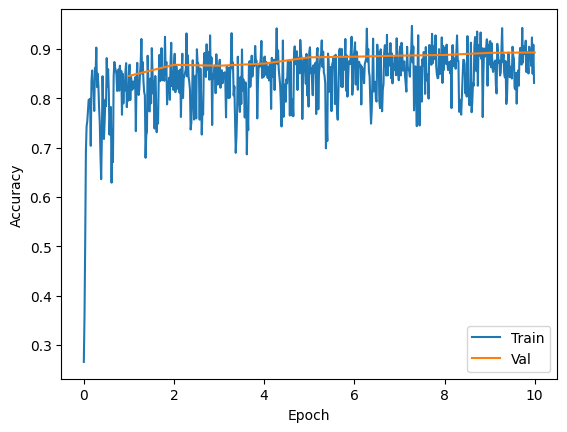

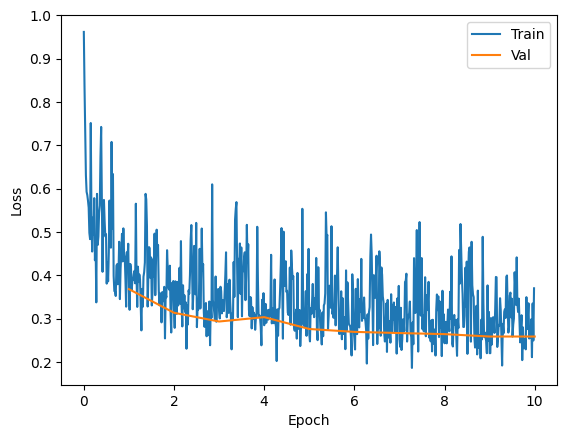

In [ ]:
# run training
results = run_training(experiment_name=f"UNet_basemodel_RGB_lr_{learning_rate}_num_epochs_{max_epochs}_lr_{learning_rate}",
                        model=model,
                        num_epochs=max_epochs,
                        optimizer=optimizer,
                        criterion=criterion,
                        train_dl=train_loader,
                        val_dl=val_loader,
                        scheduler=scheduler,
                        lr=learning_rate,
                        batch_size=batch_size,
                        device=device,
                        project_name=project_name
                        )

In [ ]:
result = evaluate(model, device, test_loader, criterion)
print(result)

(0.29317616068432273, 0.880532117053977, 0.740418764657115, 0.7993437479712039, 0.9094540119491271, 0.8508512775119235)


In [ ]:
result = evaluate(model, device, val_loader, criterion)
print(result)

(0.2587144732674627, 0.8927677584934476, 0.6874109846107572, 0.7647668929165045, 0.8717287536541566, 0.8147522931638677)


#### Visualise some predictions

In [ ]:
loader = iter(test_loader)

Visualsing 16 examples


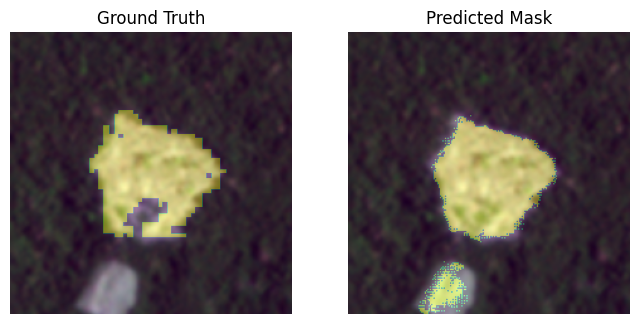

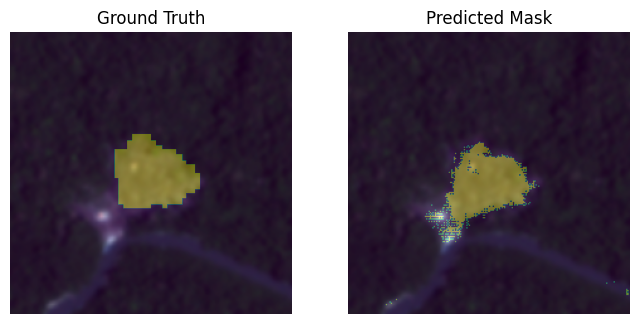

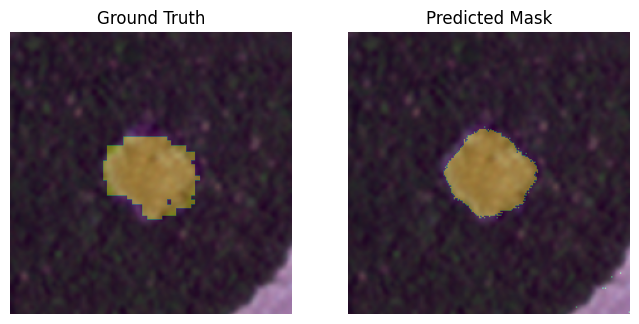

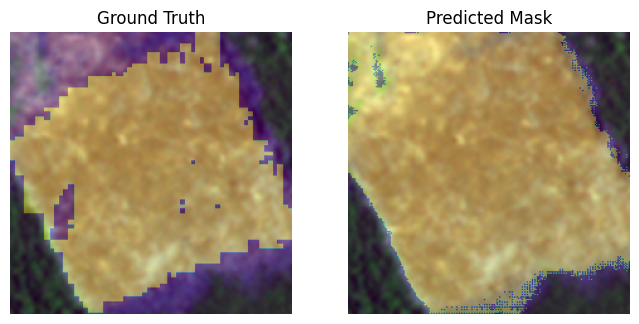

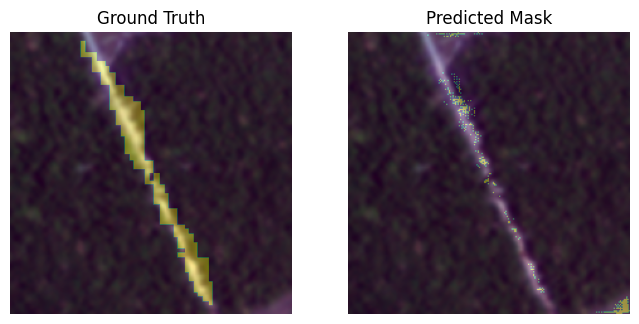

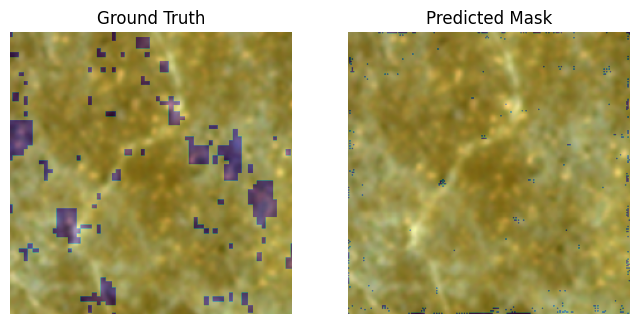

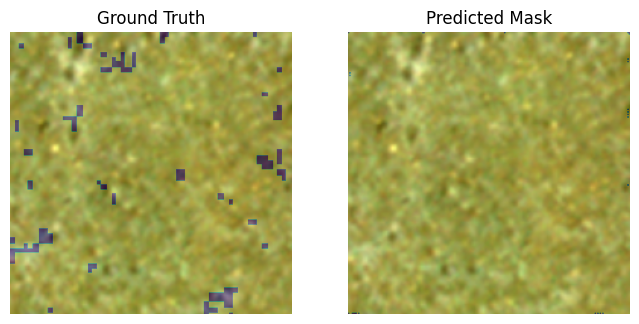

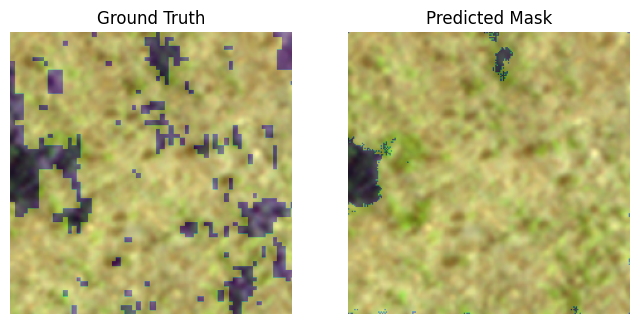

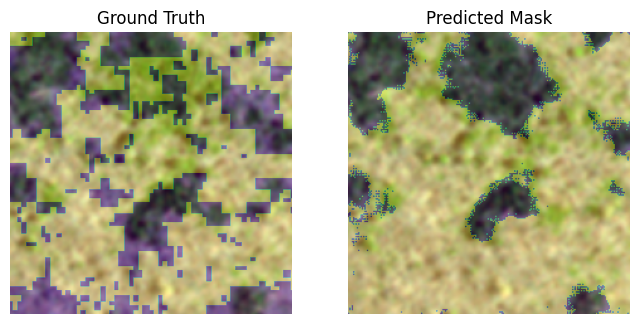

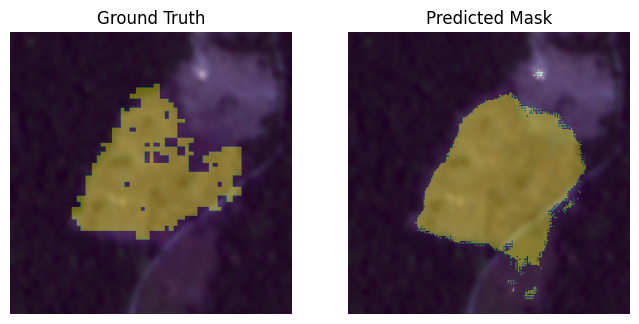

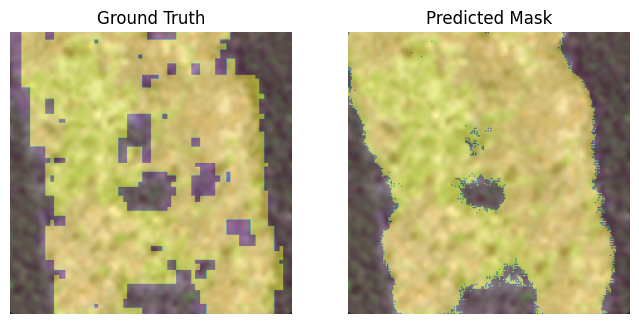

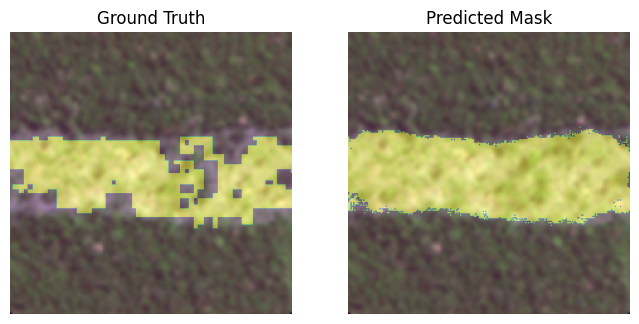

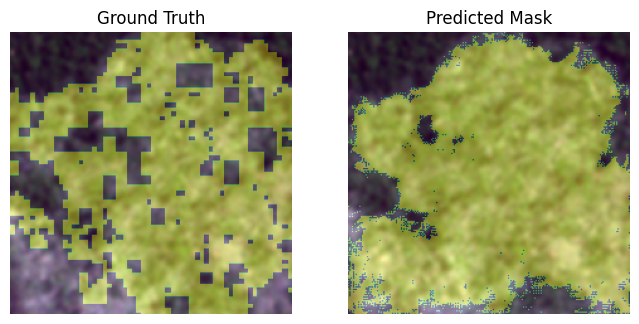

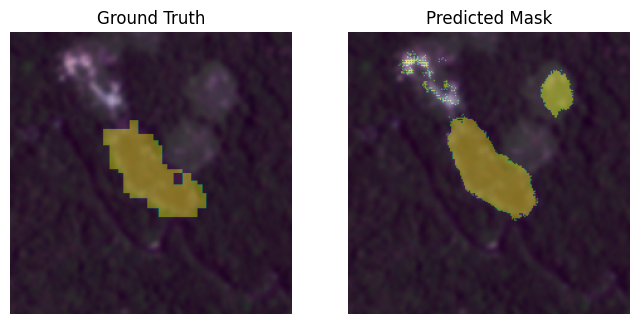

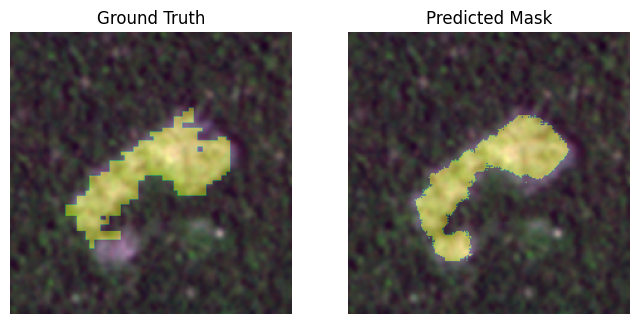

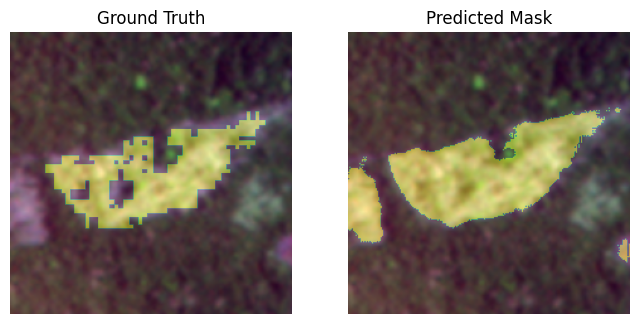

In [ ]:
batch_sample, batch_mask = next(loader)
batch_sample, batch_mask = batch_sample.to(device), batch_mask.to(device)
batch_output = model(batch_sample)
batch_predictions = batch_output.argmax(dim=1)
visualise_batch_predictions(batch_sample, batch_mask.unsqueeze(1), batch_predictions.unsqueeze(1), rescale=True, bands=bands)

## Train with R-G-B-NIR

bands = [0, 1, 2, 3]

In [ ]:
bands = [0, 1, 2, 3]

torch.manual_seed(seed)
train_loader, val_loader, test_loader = create_dataloaders(data_dir=DATA_PATH, batch_size=batch_size, bands=bands)

def init_weights(m):
  if isinstance(m, nn.Conv2d):
      torch.nn.init.kaiming_normal_(m.weight)

def fetch_UNet(n_channels, n_classes):
  model = UNet(n_channels=n_channels, n_classes=n_classes)
  model.apply(init_weights)
  return model

# define model
model = fetch_UNet(n_channels=len(bands), n_classes=2)
model.to(device)
optimizer = AdamW(model.parameters(),
                              lr=learning_rate,
                              weight_decay=1e-2)

scheduler = CosineAnnealingLR(optimizer, max_epochs)
criterion = torch.nn.CrossEntropyLoss(weight=weight_tensor)

wandb: Currently logged in as: jprado (ipeo_project). Use `wandb login --relogin` to force relogin


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 1-0 batch_loss=8.66e-01 batch_acc=0.512
Train Epoch: 1-6 batch_loss=4.61e-01 batch_acc=0.807
Train Epoch: 1-12 batch_loss=4.31e-01 batch_acc=0.845
Train Epoch: 1-18 batch_loss=2.87e-01 batch_acc=0.924
Train Epoch: 1-24 batch_loss=6.11e-01 batch_acc=0.729
Train Epoch: 1-30 batch_loss=4.72e-01 batch_acc=0.777
Train Epoch: 1-36 batch_loss=4.48e-01 batch_acc=0.803
Train Epoch: 1-42 batch_loss=5.48e-01 batch_acc=0.700
Train Epoch: 1-48 batch_loss=4.43e-01 batch_acc=0.790
Train Epoch: 1-54 batch_loss=3.96e-01 batch_acc=0.856
Train Epoch: 1-60 batch_loss=3.92e-01 batch_acc=0.834


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 2-0 batch_loss=3.42e-01 batch_acc=0.856
Train Epoch: 2-6 batch_loss=3.55e-01 batch_acc=0.845
Train Epoch: 2-12 batch_loss=3.00e-01 batch_acc=0.887
Train Epoch: 2-18 batch_loss=2.59e-01 batch_acc=0.928
Train Epoch: 2-24 batch_loss=4.35e-01 batch_acc=0.774
Train Epoch: 2-30 batch_loss=4.28e-01 batch_acc=0.801
Train Epoch: 2-36 batch_loss=4.25e-01 batch_acc=0.809
Train Epoch: 2-42 batch_loss=4.43e-01 batch_acc=0.751
Train Epoch: 2-48 batch_loss=3.49e-01 batch_acc=0.833
Train Epoch: 2-54 batch_loss=3.14e-01 batch_acc=0.884
Train Epoch: 2-60 batch_loss=3.77e-01 batch_acc=0.822


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 3-0 batch_loss=2.97e-01 batch_acc=0.869
Train Epoch: 3-6 batch_loss=3.58e-01 batch_acc=0.838
Train Epoch: 3-12 batch_loss=2.67e-01 batch_acc=0.888
Train Epoch: 3-18 batch_loss=2.43e-01 batch_acc=0.920
Train Epoch: 3-24 batch_loss=4.07e-01 batch_acc=0.794
Train Epoch: 3-30 batch_loss=4.35e-01 batch_acc=0.828
Train Epoch: 3-36 batch_loss=3.81e-01 batch_acc=0.838
Train Epoch: 3-42 batch_loss=3.89e-01 batch_acc=0.799
Train Epoch: 3-48 batch_loss=3.25e-01 batch_acc=0.850
Train Epoch: 3-54 batch_loss=3.12e-01 batch_acc=0.871
Train Epoch: 3-60 batch_loss=3.92e-01 batch_acc=0.821


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 4-0 batch_loss=2.90e-01 batch_acc=0.869
Train Epoch: 4-6 batch_loss=3.05e-01 batch_acc=0.867
Train Epoch: 4-12 batch_loss=2.83e-01 batch_acc=0.869
Train Epoch: 4-18 batch_loss=2.21e-01 batch_acc=0.924
Train Epoch: 4-24 batch_loss=4.67e-01 batch_acc=0.752
Train Epoch: 4-30 batch_loss=4.65e-01 batch_acc=0.807
Train Epoch: 4-36 batch_loss=3.54e-01 batch_acc=0.851
Train Epoch: 4-42 batch_loss=3.97e-01 batch_acc=0.785
Train Epoch: 4-48 batch_loss=3.30e-01 batch_acc=0.846
Train Epoch: 4-54 batch_loss=3.14e-01 batch_acc=0.858
Train Epoch: 4-60 batch_loss=2.83e-01 batch_acc=0.889


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 5-0 batch_loss=3.04e-01 batch_acc=0.860
Train Epoch: 5-6 batch_loss=3.33e-01 batch_acc=0.855
Train Epoch: 5-12 batch_loss=2.91e-01 batch_acc=0.863
Train Epoch: 5-18 batch_loss=2.08e-01 batch_acc=0.936
Train Epoch: 5-24 batch_loss=3.63e-01 batch_acc=0.821
Train Epoch: 5-30 batch_loss=3.94e-01 batch_acc=0.818
Train Epoch: 5-36 batch_loss=3.45e-01 batch_acc=0.856
Train Epoch: 5-42 batch_loss=4.13e-01 batch_acc=0.766
Train Epoch: 5-48 batch_loss=3.48e-01 batch_acc=0.834
Train Epoch: 5-54 batch_loss=2.72e-01 batch_acc=0.884
Train Epoch: 5-60 batch_loss=3.55e-01 batch_acc=0.833


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 6-0 batch_loss=2.51e-01 batch_acc=0.894
Train Epoch: 6-6 batch_loss=2.89e-01 batch_acc=0.875
Train Epoch: 6-12 batch_loss=2.32e-01 batch_acc=0.900
Train Epoch: 6-18 batch_loss=2.39e-01 batch_acc=0.916
Train Epoch: 6-24 batch_loss=3.42e-01 batch_acc=0.830
Train Epoch: 6-30 batch_loss=3.51e-01 batch_acc=0.832
Train Epoch: 6-36 batch_loss=4.44e-01 batch_acc=0.816
Train Epoch: 6-42 batch_loss=3.96e-01 batch_acc=0.781
Train Epoch: 6-48 batch_loss=4.01e-01 batch_acc=0.799
Train Epoch: 6-54 batch_loss=2.55e-01 batch_acc=0.900
Train Epoch: 6-60 batch_loss=3.37e-01 batch_acc=0.847


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 7-0 batch_loss=2.37e-01 batch_acc=0.901
Train Epoch: 7-6 batch_loss=2.87e-01 batch_acc=0.873
Train Epoch: 7-12 batch_loss=2.34e-01 batch_acc=0.904
Train Epoch: 7-18 batch_loss=2.70e-01 batch_acc=0.891
Train Epoch: 7-24 batch_loss=4.14e-01 batch_acc=0.777
Train Epoch: 7-30 batch_loss=3.20e-01 batch_acc=0.859
Train Epoch: 7-36 batch_loss=3.03e-01 batch_acc=0.879
Train Epoch: 7-42 batch_loss=4.50e-01 batch_acc=0.753
Train Epoch: 7-48 batch_loss=2.92e-01 batch_acc=0.871
Train Epoch: 7-54 batch_loss=2.43e-01 batch_acc=0.909
Train Epoch: 7-60 batch_loss=3.05e-01 batch_acc=0.854


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 8-0 batch_loss=2.17e-01 batch_acc=0.911
Train Epoch: 8-6 batch_loss=3.63e-01 batch_acc=0.839
Train Epoch: 8-12 batch_loss=2.68e-01 batch_acc=0.876
Train Epoch: 8-18 batch_loss=2.02e-01 batch_acc=0.932
Train Epoch: 8-24 batch_loss=4.08e-01 batch_acc=0.780
Train Epoch: 8-30 batch_loss=3.08e-01 batch_acc=0.867
Train Epoch: 8-36 batch_loss=3.95e-01 batch_acc=0.836
Train Epoch: 8-42 batch_loss=3.51e-01 batch_acc=0.823
Train Epoch: 8-48 batch_loss=3.28e-01 batch_acc=0.851
Train Epoch: 8-54 batch_loss=2.41e-01 batch_acc=0.909
Train Epoch: 8-60 batch_loss=3.27e-01 batch_acc=0.843


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 9-0 batch_loss=2.33e-01 batch_acc=0.901
Train Epoch: 9-6 batch_loss=2.89e-01 batch_acc=0.875
Train Epoch: 9-12 batch_loss=2.94e-01 batch_acc=0.868
Train Epoch: 9-18 batch_loss=1.86e-01 batch_acc=0.940
Train Epoch: 9-24 batch_loss=3.75e-01 batch_acc=0.803
Train Epoch: 9-30 batch_loss=3.53e-01 batch_acc=0.847
Train Epoch: 9-36 batch_loss=2.87e-01 batch_acc=0.888
Train Epoch: 9-42 batch_loss=3.32e-01 batch_acc=0.839
Train Epoch: 9-48 batch_loss=3.37e-01 batch_acc=0.849
Train Epoch: 9-54 batch_loss=2.29e-01 batch_acc=0.915
Train Epoch: 9-60 batch_loss=2.48e-01 batch_acc=0.895


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 10-0 batch_loss=2.04e-01 batch_acc=0.924
Train Epoch: 10-6 batch_loss=3.50e-01 batch_acc=0.849
Train Epoch: 10-12 batch_loss=2.26e-01 batch_acc=0.906
Train Epoch: 10-18 batch_loss=2.28e-01 batch_acc=0.914
Train Epoch: 10-24 batch_loss=3.83e-01 batch_acc=0.811
Train Epoch: 10-30 batch_loss=3.62e-01 batch_acc=0.853
Train Epoch: 10-36 batch_loss=3.75e-01 batch_acc=0.842
Train Epoch: 10-42 batch_loss=3.30e-01 batch_acc=0.843
Train Epoch: 10-48 batch_loss=2.76e-01 batch_acc=0.877
Train Epoch: 10-54 batch_loss=2.47e-01 batch_acc=0.903
Train Epoch: 10-60 batch_loss=2.44e-01 batch_acc=0.898


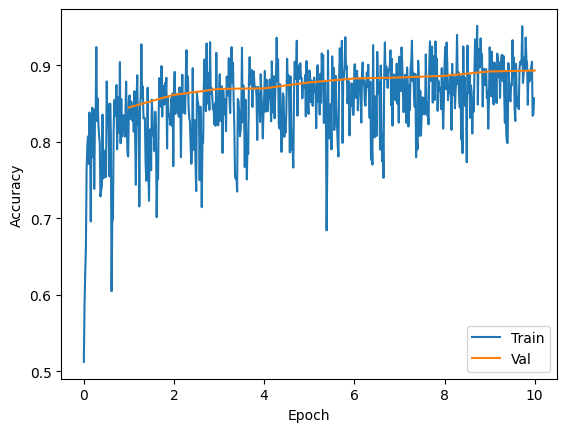

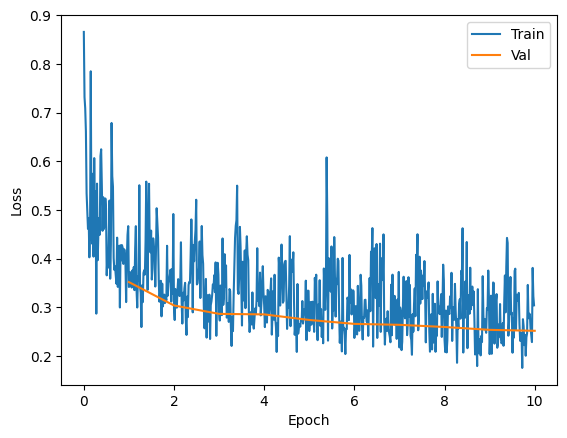

In [ ]:
# run training
results = run_training(experiment_name=f"UNet_basemodel_RGBNIR_lr_{learning_rate}_num_epochs_{max_epochs}_lr_{learning_rate}",
                        model=model,
                        num_epochs=max_epochs,
                        optimizer=optimizer,
                        criterion=criterion,
                        train_dl=train_loader,
                        val_dl=val_loader,
                        scheduler=scheduler,
                        lr=learning_rate,
                        batch_size=batch_size,
                        device=device,
                        project_name=project_name
                        )

In [ ]:
result = evaluate(model, device, test_loader, criterion)
print(result)

(0.28639609127078375, 0.8799821800407442, 0.7381224840524441, 0.8018289385125715, 0.902820494700178, 0.8493331060668482)


In [ ]:
result = evaluate(model, device, val_loader, criterion)
print(result)

(0.2516791316179129, 0.8932811353533888, 0.6891556276926004, 0.7646885720902428, 0.8746387731889872, 0.8159764753399217)


#### Visualise some predictions

In [ ]:
loader = iter(test_loader)

Visualsing 16 examples


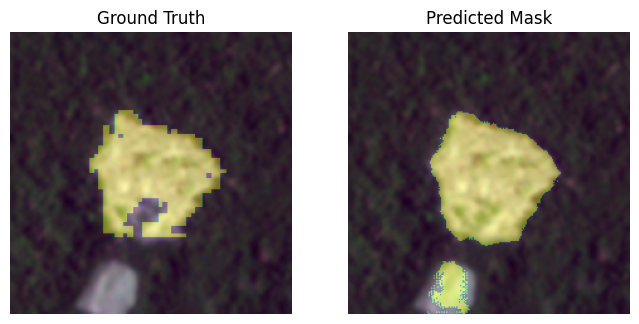

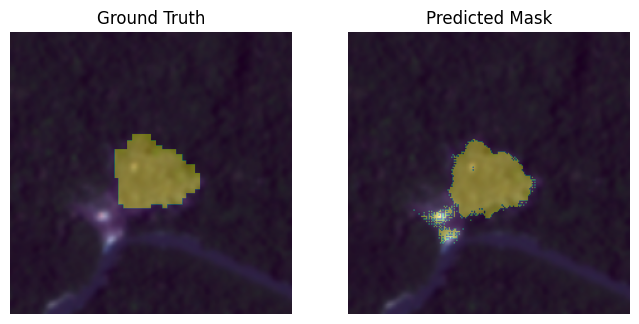

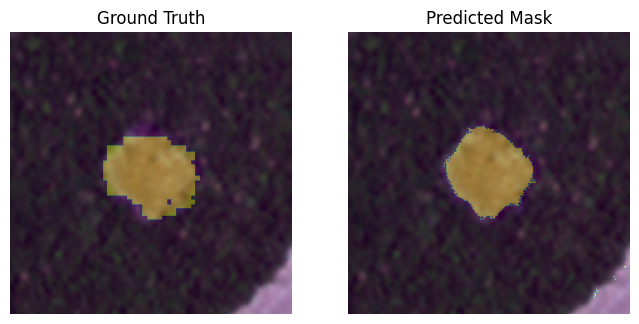

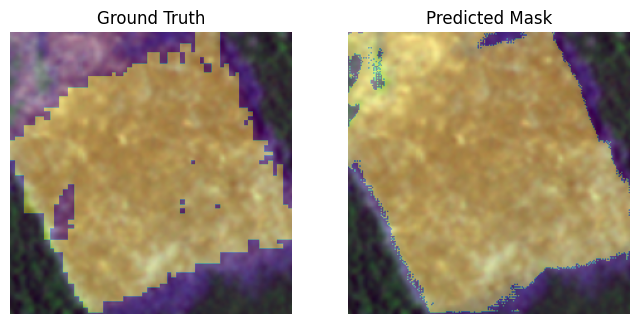

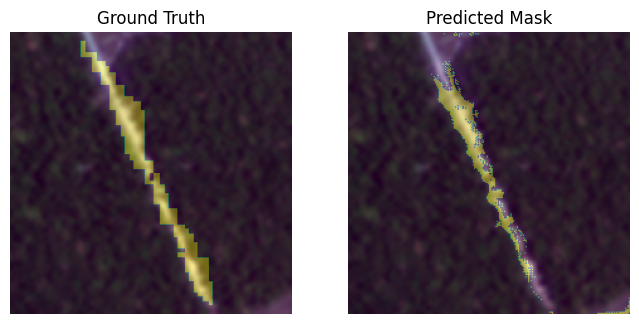

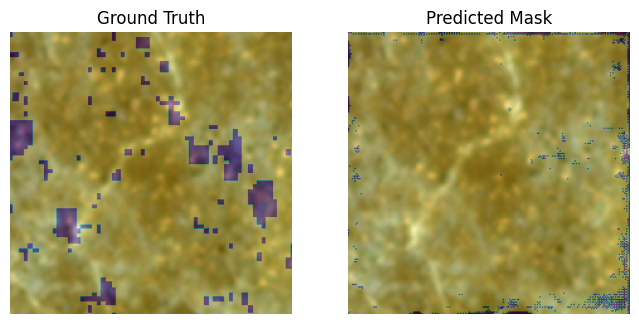

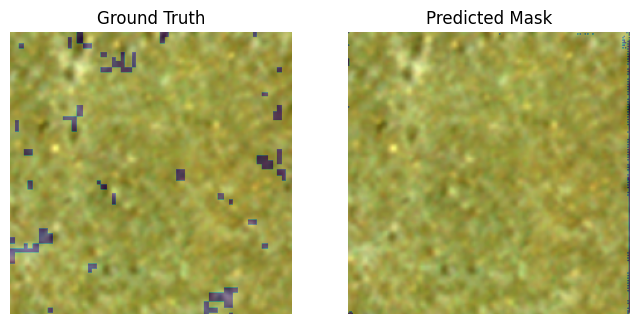

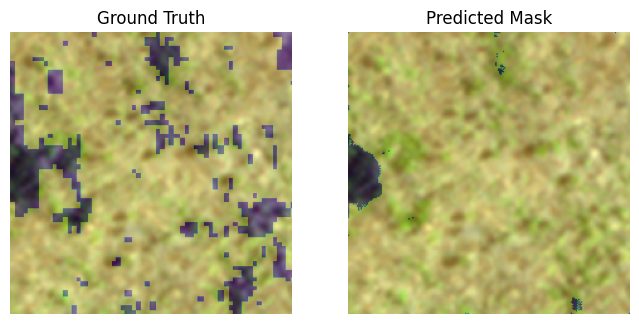

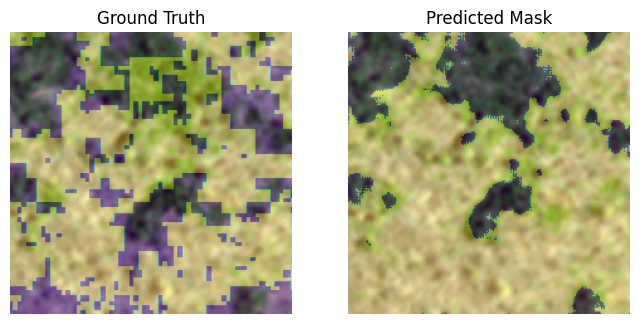

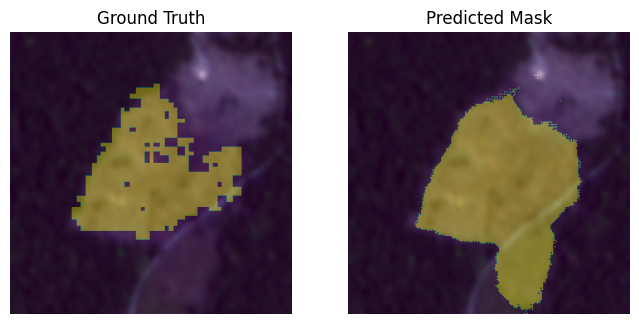

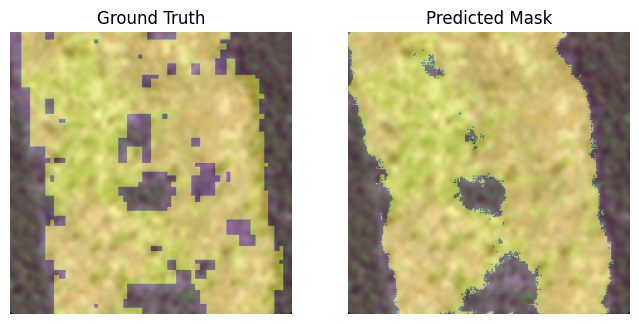

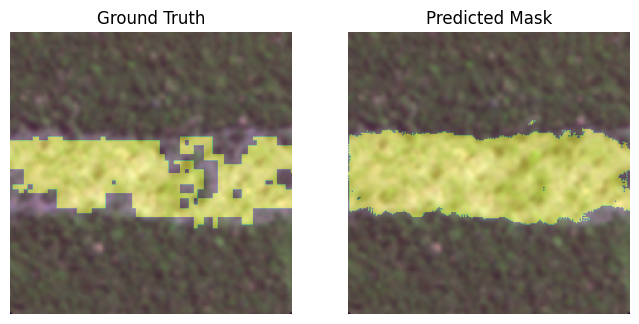

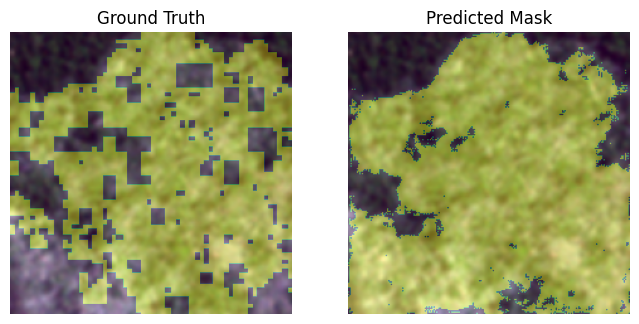

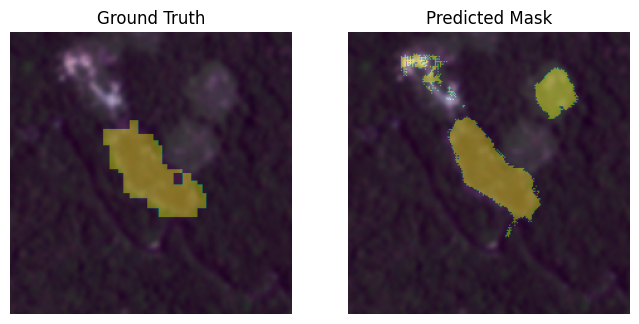

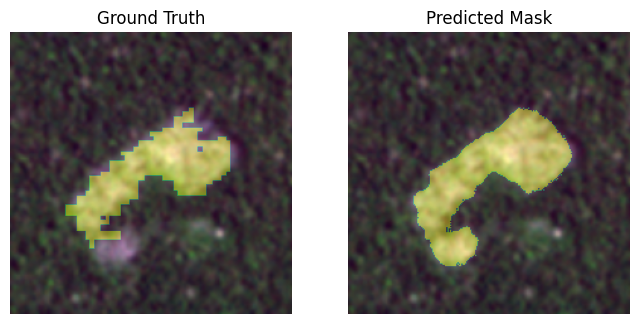

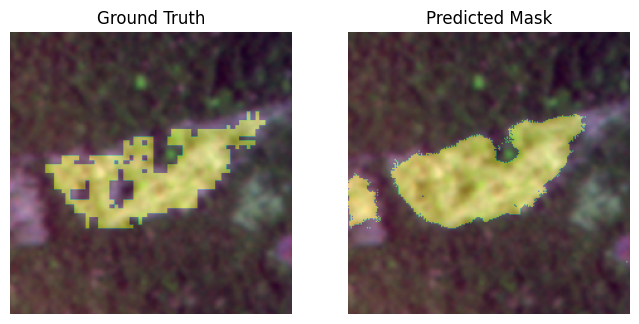

In [ ]:
batch_sample, batch_mask = next(loader)
batch_sample, batch_mask = batch_sample.to(device), batch_mask.to(device)
batch_output = model(batch_sample)
batch_predictions = batch_output.argmax(dim=1)
visualise_batch_predictions(batch_sample, batch_mask.unsqueeze(1), batch_predictions.unsqueeze(1), rescale=True, bands=bands)

### Train with R-G_NIR
bands = [0, 1, 3]

In [ ]:
bands = [0, 1, 3]

torch.manual_seed(seed)
train_loader, val_loader, test_loader = create_dataloaders(data_dir=DATA_PATH, batch_size=batch_size, bands=bands)

def init_weights(m):
  if isinstance(m, nn.Conv2d):
      torch.nn.init.kaiming_normal_(m.weight)

def fetch_UNet(n_channels, n_classes):
  model = UNet(n_channels=n_channels, n_classes=n_classes)
  model.apply(init_weights)
  return model

# define model
model = fetch_UNet(n_channels=len(bands), n_classes=2)
model.to(device)
optimizer = AdamW(model.parameters(),
                              lr=learning_rate,
                              weight_decay=1e-2)

scheduler = CosineAnnealingLR(optimizer, max_epochs)
criterion = torch.nn.CrossEntropyLoss(weight=weight_tensor)

  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 1-0 batch_loss=7.42e-01 batch_acc=0.508
Train Epoch: 1-6 batch_loss=5.29e-01 batch_acc=0.795
Train Epoch: 1-12 batch_loss=4.58e-01 batch_acc=0.855
Train Epoch: 1-18 batch_loss=3.11e-01 batch_acc=0.901
Train Epoch: 1-24 batch_loss=5.73e-01 batch_acc=0.769
Train Epoch: 1-30 batch_loss=4.58e-01 batch_acc=0.780
Train Epoch: 1-36 batch_loss=4.93e-01 batch_acc=0.797
Train Epoch: 1-42 batch_loss=6.25e-01 batch_acc=0.667
Train Epoch: 1-48 batch_loss=4.34e-01 batch_acc=0.792
Train Epoch: 1-54 batch_loss=4.35e-01 batch_acc=0.843
Train Epoch: 1-60 batch_loss=3.91e-01 batch_acc=0.862


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 2-0 batch_loss=3.47e-01 batch_acc=0.861
Train Epoch: 2-6 batch_loss=3.59e-01 batch_acc=0.846
Train Epoch: 2-12 batch_loss=3.18e-01 batch_acc=0.877
Train Epoch: 2-18 batch_loss=2.67e-01 batch_acc=0.920
Train Epoch: 2-24 batch_loss=5.47e-01 batch_acc=0.708
Train Epoch: 2-30 batch_loss=4.77e-01 batch_acc=0.782
Train Epoch: 2-36 batch_loss=4.54e-01 batch_acc=0.795
Train Epoch: 2-42 batch_loss=4.44e-01 batch_acc=0.765
Train Epoch: 2-48 batch_loss=3.54e-01 batch_acc=0.843
Train Epoch: 2-54 batch_loss=3.44e-01 batch_acc=0.873
Train Epoch: 2-60 batch_loss=3.15e-01 batch_acc=0.878


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 3-0 batch_loss=3.09e-01 batch_acc=0.868
Train Epoch: 3-6 batch_loss=3.16e-01 batch_acc=0.861
Train Epoch: 3-12 batch_loss=2.76e-01 batch_acc=0.888
Train Epoch: 3-18 batch_loss=2.40e-01 batch_acc=0.925
Train Epoch: 3-24 batch_loss=4.60e-01 batch_acc=0.737
Train Epoch: 3-30 batch_loss=4.05e-01 batch_acc=0.837
Train Epoch: 3-36 batch_loss=3.93e-01 batch_acc=0.835
Train Epoch: 3-42 batch_loss=4.25e-01 batch_acc=0.766
Train Epoch: 3-48 batch_loss=3.19e-01 batch_acc=0.863
Train Epoch: 3-54 batch_loss=3.20e-01 batch_acc=0.878
Train Epoch: 3-60 batch_loss=4.32e-01 batch_acc=0.793


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 4-0 batch_loss=3.00e-01 batch_acc=0.869
Train Epoch: 4-6 batch_loss=3.09e-01 batch_acc=0.858
Train Epoch: 4-12 batch_loss=3.24e-01 batch_acc=0.858
Train Epoch: 4-18 batch_loss=2.47e-01 batch_acc=0.926
Train Epoch: 4-24 batch_loss=4.68e-01 batch_acc=0.740
Train Epoch: 4-30 batch_loss=4.95e-01 batch_acc=0.790
Train Epoch: 4-36 batch_loss=5.14e-01 batch_acc=0.784
Train Epoch: 4-42 batch_loss=4.53e-01 batch_acc=0.748
Train Epoch: 4-48 batch_loss=3.24e-01 batch_acc=0.854
Train Epoch: 4-54 batch_loss=3.18e-01 batch_acc=0.883
Train Epoch: 4-60 batch_loss=2.95e-01 batch_acc=0.879


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 5-0 batch_loss=2.65e-01 batch_acc=0.895
Train Epoch: 5-6 batch_loss=3.04e-01 batch_acc=0.862
Train Epoch: 5-12 batch_loss=3.08e-01 batch_acc=0.845
Train Epoch: 5-18 batch_loss=2.11e-01 batch_acc=0.938
Train Epoch: 5-24 batch_loss=3.79e-01 batch_acc=0.812
Train Epoch: 5-30 batch_loss=3.75e-01 batch_acc=0.846
Train Epoch: 5-36 batch_loss=3.69e-01 batch_acc=0.846
Train Epoch: 5-42 batch_loss=3.79e-01 batch_acc=0.784
Train Epoch: 5-48 batch_loss=4.13e-01 batch_acc=0.817
Train Epoch: 5-54 batch_loss=3.04e-01 batch_acc=0.877
Train Epoch: 5-60 batch_loss=3.71e-01 batch_acc=0.820


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 6-0 batch_loss=2.57e-01 batch_acc=0.901
Train Epoch: 6-6 batch_loss=3.23e-01 batch_acc=0.870
Train Epoch: 6-12 batch_loss=2.43e-01 batch_acc=0.902
Train Epoch: 6-18 batch_loss=2.52e-01 batch_acc=0.907
Train Epoch: 6-24 batch_loss=4.70e-01 batch_acc=0.744
Train Epoch: 6-30 batch_loss=3.52e-01 batch_acc=0.854
Train Epoch: 6-36 batch_loss=3.63e-01 batch_acc=0.847
Train Epoch: 6-42 batch_loss=3.37e-01 batch_acc=0.828
Train Epoch: 6-48 batch_loss=3.48e-01 batch_acc=0.828
Train Epoch: 6-54 batch_loss=2.98e-01 batch_acc=0.884
Train Epoch: 6-60 batch_loss=2.79e-01 batch_acc=0.886


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 7-0 batch_loss=2.47e-01 batch_acc=0.901
Train Epoch: 7-6 batch_loss=3.01e-01 batch_acc=0.868
Train Epoch: 7-12 batch_loss=3.03e-01 batch_acc=0.856
Train Epoch: 7-18 batch_loss=1.95e-01 batch_acc=0.941
Train Epoch: 7-24 batch_loss=4.52e-01 batch_acc=0.768
Train Epoch: 7-30 batch_loss=3.51e-01 batch_acc=0.849
Train Epoch: 7-36 batch_loss=5.37e-01 batch_acc=0.758
Train Epoch: 7-42 batch_loss=3.21e-01 batch_acc=0.844
Train Epoch: 7-48 batch_loss=3.49e-01 batch_acc=0.838
Train Epoch: 7-54 batch_loss=3.02e-01 batch_acc=0.885
Train Epoch: 7-60 batch_loss=3.53e-01 batch_acc=0.832


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 8-0 batch_loss=2.42e-01 batch_acc=0.906
Train Epoch: 8-6 batch_loss=3.02e-01 batch_acc=0.873
Train Epoch: 8-12 batch_loss=3.02e-01 batch_acc=0.857
Train Epoch: 8-18 batch_loss=1.91e-01 batch_acc=0.944
Train Epoch: 8-24 batch_loss=3.53e-01 batch_acc=0.821
Train Epoch: 8-30 batch_loss=3.41e-01 batch_acc=0.853
Train Epoch: 8-36 batch_loss=3.49e-01 batch_acc=0.847
Train Epoch: 8-42 batch_loss=3.53e-01 batch_acc=0.826
Train Epoch: 8-48 batch_loss=2.83e-01 batch_acc=0.882
Train Epoch: 8-54 batch_loss=3.79e-01 batch_acc=0.833
Train Epoch: 8-60 batch_loss=3.20e-01 batch_acc=0.850


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 9-0 batch_loss=2.37e-01 batch_acc=0.906
Train Epoch: 9-6 batch_loss=2.98e-01 batch_acc=0.870
Train Epoch: 9-12 batch_loss=2.31e-01 batch_acc=0.909
Train Epoch: 9-18 batch_loss=2.15e-01 batch_acc=0.927
Train Epoch: 9-24 batch_loss=4.39e-01 batch_acc=0.772
Train Epoch: 9-30 batch_loss=3.94e-01 batch_acc=0.835
Train Epoch: 9-36 batch_loss=5.69e-01 batch_acc=0.749
Train Epoch: 9-42 batch_loss=3.40e-01 batch_acc=0.827
Train Epoch: 9-48 batch_loss=3.41e-01 batch_acc=0.842
Train Epoch: 9-54 batch_loss=2.72e-01 batch_acc=0.897
Train Epoch: 9-60 batch_loss=2.60e-01 batch_acc=0.895


  0%|          | 0/65 [00:00<?, ?it/s]

Train Epoch: 10-0 batch_loss=2.20e-01 batch_acc=0.918
Train Epoch: 10-6 batch_loss=3.00e-01 batch_acc=0.869
Train Epoch: 10-12 batch_loss=2.64e-01 batch_acc=0.890
Train Epoch: 10-18 batch_loss=1.97e-01 batch_acc=0.941
Train Epoch: 10-24 batch_loss=3.84e-01 batch_acc=0.800
Train Epoch: 10-30 batch_loss=4.51e-01 batch_acc=0.805
Train Epoch: 10-36 batch_loss=4.76e-01 batch_acc=0.796
Train Epoch: 10-42 batch_loss=3.37e-01 batch_acc=0.829
Train Epoch: 10-48 batch_loss=2.77e-01 batch_acc=0.876
Train Epoch: 10-54 batch_loss=2.88e-01 batch_acc=0.884
Train Epoch: 10-60 batch_loss=3.08e-01 batch_acc=0.857


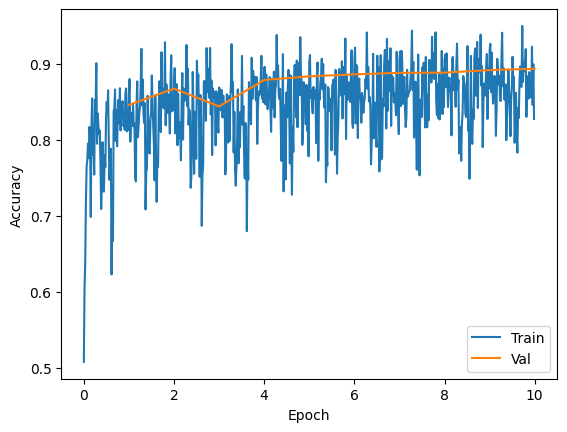

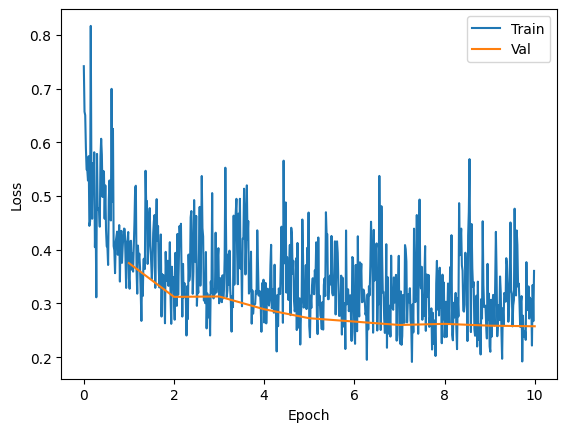

In [ ]:
# run training
results = run_training(experiment_name=f"UNet_basemodel_RGNIR_lr_{learning_rate}_num_epochs_{max_epochs}_lr_{learning_rate}",
                        model=model,
                        num_epochs=max_epochs,
                        optimizer=optimizer,
                        criterion=criterion,
                        train_dl=train_loader,
                        val_dl=val_loader,
                        scheduler=scheduler,
                        lr=learning_rate,
                        batch_size=batch_size,
                        device=device,
                        project_name=project_name
                        )

In [ ]:
result = evaluate(model, device, test_loader, criterion)
print(result)

(0.2939423793406874, 0.8806763443562053, 0.7386397729535672, 0.8046763527459903, 0.9000055633283439, 0.8496754583024183)


In [ ]:
result = evaluate(model, device, val_loader, criterion)
print(result)

#### Visualise some predictions

In [ ]:
loader = iter(train_loader)

In [ ]:
batch_sample, batch_mask = next(loader)
batch_sample, batch_mask = batch_sample.to(device), batch_mask.to(device)
batch_output = model(batch_sample)
batch_predictions = batch_output.argmax(dim=1)
visualise_batch_predictions(batch_sample, batch_mask.unsqueeze(1), batch_predictions.unsqueeze(1), rescale=True, bands=bands)

### Train with R-G-NDVI
bands = [0, 1, 4]

In [ ]:
bands = [0, 1, 4]

torch.manual_seed(seed)
train_loader, val_loader, test_loader = create_dataloaders(data_dir=DATA_PATH, batch_size=batch_size, bands=bands)

def init_weights(m):
  if isinstance(m, nn.Conv2d):
      torch.nn.init.kaiming_normal_(m.weight)

def fetch_UNet(n_channels, n_classes):
  model = UNet(n_channels=n_channels, n_classes=n_classes)
  model.apply(init_weights)
  return model

# define model
model = fetch_UNet(n_channels=len(bands), n_classes=2)
model.to(device)
optimizer = AdamW(model.parameters(),
                              lr=learning_rate,
                              weight_decay=1e-2)

scheduler = CosineAnnealingLR(optimizer, max_epochs)
criterion = torch.nn.CrossEntropyLoss(weight=weight_tensor)

In [ ]:
# run training
results = run_training(experiment_name=f"UNet_basemodel_RGNDVI_lr_{learning_rate}_num_epochs_{max_epochs}_lr_{learning_rate}",
                        model=model,
                        num_epochs=max_epochs,
                        optimizer=optimizer,
                        criterion=criterion,
                        train_dl=train_loader,
                        val_dl=val_loader,
                        scheduler=scheduler,
                        lr=learning_rate,
                        batch_size=batch_size,
                        device=device,
                        project_name=project_name
                        )

In [ ]:
result = evaluate(model, device, test_loader, criterion)
print(result)

In [ ]:
result = evaluate(model, device, val_loader, criterion)
print(result)

#### Visualise some predictions

In [ ]:
loader = iter(train_loader)

In [ ]:
batch_sample, batch_mask = next(loader)
batch_sample, batch_mask = batch_sample.to(device), batch_mask.to(device)
batch_output = model(batch_sample)
batch_predictions = batch_output.argmax(dim=1)
visualise_batch_predictions(batch_sample, batch_mask.unsqueeze(1), batch_predictions.unsqueeze(1), rescale=True, bands=bands)